# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.neighbors import KNeighborsClassifier


# Data Preprocessing

In [2]:
df=pd.read_csv('Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
X=df.iloc[:,1:-1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [7]:
y=df['type']

In [8]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [9]:
xtrain,xvalid,ytrain,yvalid=train_test_split(X,y,test_size=.2,random_state=42)

# Finding n_neighbors value

In [25]:
accu=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    y_pred=knn.predict(xvalid)
    accu.append(accuracy_score(yvalid,y_pred))
print(accu)

[1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]


Text(0, 0.5, 'Accuracy')

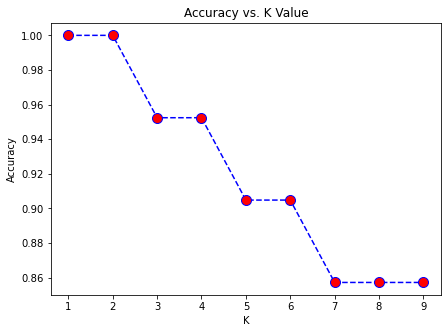

In [90]:
plt.figure(figsize=(7,5))
plt.plot(range(1,10),accu,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

__K with value of 1 and 2 are giving the highest accuracy So taking 2 as my n_neihhbous values because there are less number of records for testing data.__

In [82]:
knn=KNeighborsClassifier(n_neighbors=2)

In [83]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [84]:
y_pred=knn.predict(xvalid)

In [85]:
confusion_matrix(yvalid,y_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [86]:
result=pd.DataFrame({'yvalid':yvalid,'y_pred':y_pred})
result.head()

,yvalid,y_pred
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1


In [87]:
print(result.yvalid.value_counts())
print(result.y_pred.value_counts())

1    12
6     3
4     2
2     2
7     1
3     1
Name: yvalid, dtype: int64
1    12
6     3
4     2
2     2
7     1
3     1
Name: y_pred, dtype: int64


In [88]:
print(classification_report(yvalid,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

